## <font size=5> <strong>Heart Disease Prediction By Sandesh Paudel
 

## I. Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.DS_Store', 'heart.csv', 'Heart_disease_prediction.ipynb', 'static', 'app.py', 'templates', '.ipynb_checkpoints', 'model_randomforest']


## II. Importing and understanding our dataset 

In [2]:
dataset = pd.read_csv("heart.csv")

#### Verifying it as a 'dataframe' object in pandas

In [3]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [4]:
dataset.shape

(303, 14)

#### Printing out a few columns

In [5]:
dataset.head(5)

,age,sex,cpt,restbp,schol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
dataset.sample(5)

,age,sex,cpt,restbp,schol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
273,58,1,0,100,234,0,1,156,0,0.1,2,1,3,0
93,54,0,1,132,288,1,0,159,1,0.0,2,1,2,1
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


#### Description

In [7]:
dataset.describe()

,age,sex,cpt,restbp,schol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int64  
 1   sex      303 non-null    int64  
 2   cpt      303 non-null    int64  
 3   restbp   303 non-null    int64  
 4   schol    303 non-null    int64  
 5   fbs      303 non-null    int64  
 6   restecg  303 non-null    int64  
 7   thalach  303 non-null    int64  
 8   exang    303 non-null    int64  
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    int64  
 11  ca       303 non-null    int64  
 12  thal     303 non-null    int64  
 13  target   303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
###Luckily, we have no missing values

#### Let's understand our columns better:

In [10]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])
    print()

age:			age

sex:			1: male, 0: female

cpt:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic

restbp:			resting blood pressure

schol:			 serum cholestoral in mg/dl

fbs:			fasting blood sugar > 120 mg/dl

restecg:			resting electrocardiographic results (values 0,1,2)

thalach:			 maximum heart rate achieved

exang:			exercise induced angina

oldpeak:			oldpeak = ST depression induced by exercise relative to rest

slope:			the slope of the peak exercise ST segment

ca:			number of major vessels (0-3) colored by flourosopy

thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect



#### Analysing the 'target' variable

In [11]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [12]:
dataset["target"].unique()

array([1, 0])

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [13]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target     1.000000
exang      0.436757
cpt        0.433798
oldpeak    0.430696
thalach    0.421741
ca         0.391724
slope      0.345877
thal       0.344029
sex        0.280937
age        0.225439
restbp     0.144931
restecg    0.137230
schol      0.085239
fbs        0.028046
Name: target, dtype: float64


In [14]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

1    165
0    138
Name: target, dtype: int64


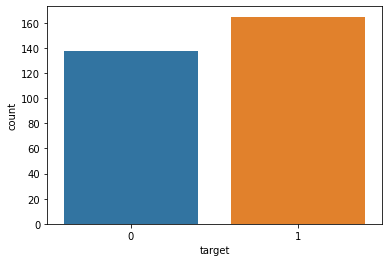

In [15]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [16]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

In [17]:
dataset["sex"].unique()

array([1, 0])

##### We notice, that as expected, the 'sex' feature has 2 unique features

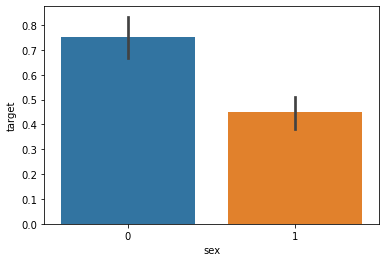

In [18]:
sns.barplot(dataset["sex"],y)

##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [20]:
dataset["cpt"].unique()

array([3, 2, 1, 0])

##### As expected, the CP feature has values from 0 to 3

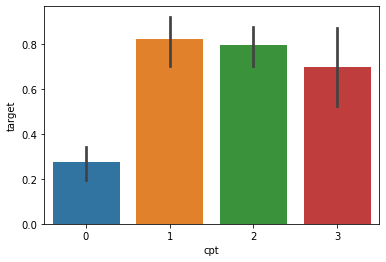

In [21]:
sns.barplot(dataset["cpt"],y)

##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature

In [22]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [23]:
dataset["fbs"].unique()

array([1, 0])

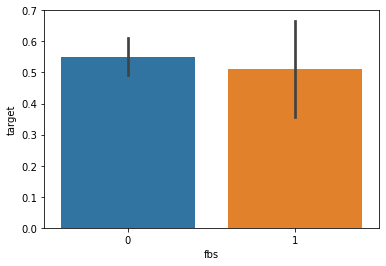

In [24]:
sns.barplot(dataset["fbs"],y)

##### Nothing extraordinary here

### Analysing the restecg feature

In [25]:
dataset["restecg"].unique()

array([0, 1, 2])

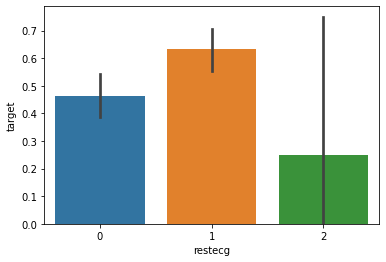

In [26]:
sns.barplot(dataset["restecg"],y)

##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [27]:
dataset["exang"].unique()

array([0, 1])

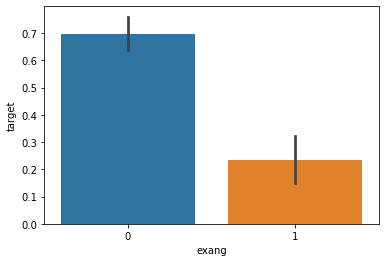

In [28]:
sns.barplot(dataset["exang"],y)

##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [29]:
dataset["slope"].unique()

array([0, 2, 1])

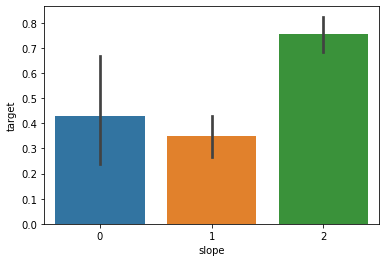

In [30]:
sns.barplot(dataset["slope"],y)

##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the 'ca' feature

In [31]:
#number of major vessels (0-3) colored by flourosopy

In [32]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4])

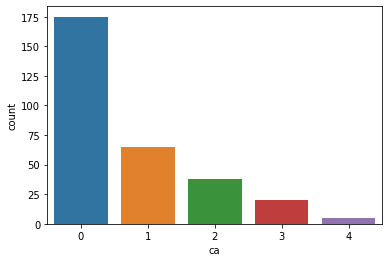

In [33]:
sns.countplot(dataset["ca"])

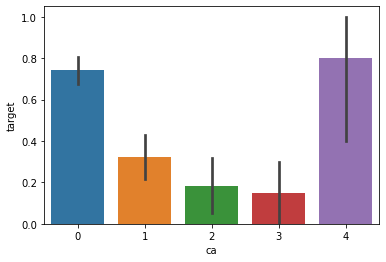

In [34]:
sns.barplot(dataset["ca"],y)

##### ca=4 has astonishingly large number of heart patients

In [35]:
### Analysing the 'thal' feature

In [36]:
dataset["thal"].unique()

array([1, 2, 3, 0])

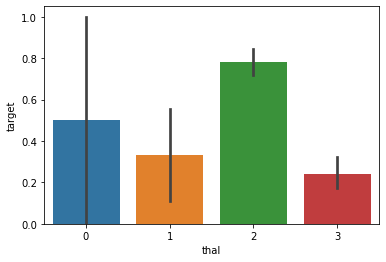

In [37]:
sns.barplot(dataset["thal"],y)

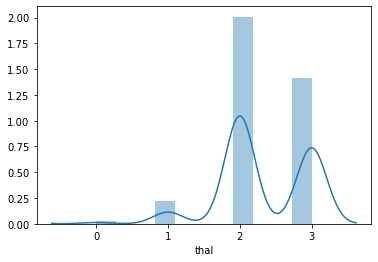

In [38]:
sns.distplot(dataset["thal"])

## IV. Train Test split

In [39]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [40]:
X_train.shape

(242, 13)

In [41]:
X_test.shape

(61, 13)

In [42]:
Y_train.shape

(242,)

In [43]:
Y_test.shape

(61,)

## V. Model Fitting

In [44]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [46]:
Y_pred_lr.shape

(61,)

In [47]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


### Naive Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [49]:
Y_pred_nb.shape

(61,)

In [50]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


### SVM

In [51]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [52]:
Y_pred_svm.shape

(61,)

In [53]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


### K Nearest Neighbors

In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [55]:
Y_pred_knn.shape

(61,)

In [56]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


### Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [58]:
print(Y_pred_dt.shape)

(61,)


In [59]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


### Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [61]:
Y_pred_rf.shape

(61,)

In [62]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 90.16 %


### XGBoost

### Neural Network

In [63]:
import keras

In [64]:
from keras.models import Sequential
from keras.layers import Dense

In [65]:
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [66]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
8/8 [==============================] - 12s 2ms/step - loss: 15.1825 - accuracy: 0.5422
Epoch 2/300
8/8 [==============================] - 0s 2ms/step - loss: 8.9969 - accuracy: 0.4999
Epoch 3/300
8/8 [==============================] - 0s 2ms/step - loss: 3.0214 - accuracy: 0.4371
Epoch 4/300
8/8 [==============================] - 0s 3ms/step - loss: 3.5980 - accuracy: 0.3520
Epoch 5/300
8/8 [==============================] - 0s 3ms/step - loss: 2.7544 - accuracy: 0.4273
Epoch 6/300
8/8 [==============================] - 0s 2ms/step - loss: 2.4979 - accuracy: 0.4859
Epoch 7/300
8/8 [==============================] - 0s 2ms/step - loss: 2.5023 - accuracy: 0.4544
Epoch 8/300
8/8 [==============================] - 0s 2ms/step - loss: 2.3303 - accuracy: 0.4368
Epoch 9/300
8/8 [==============================] - 0s 2ms/step - loss: 2.2737 - accuracy: 0.4955
Epoch 10/300
8/8 [==============================] - 0s 2ms/step - loss: 2.3159 - accuracy: 0.4711
Epoch 11/300
8/8 [=========

8/8 [==============================] - 0s 2ms/step - loss: 0.4768 - accuracy: 0.7712
Epoch 85/300
8/8 [==============================] - 0s 2ms/step - loss: 0.5066 - accuracy: 0.7699
Epoch 86/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4448 - accuracy: 0.7850
Epoch 87/300
8/8 [==============================] - 0s 2ms/step - loss: 0.5151 - accuracy: 0.7507
Epoch 88/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4559 - accuracy: 0.7845
Epoch 89/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4537 - accuracy: 0.7698
Epoch 90/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4485 - accuracy: 0.7696
Epoch 91/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4152 - accuracy: 0.8270
Epoch 92/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4260 - accuracy: 0.8108
Epoch 93/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4204 - accuracy: 0.8219
Epoch 94/300
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.4075 - accuracy: 0.8036
Epoch 167/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3751 - accuracy: 0.8254
Epoch 168/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4260 - accuracy: 0.7759
Epoch 169/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3443 - accuracy: 0.8423
Epoch 170/300
8/8 [==============================] - 0s 1ms/step - loss: 0.3772 - accuracy: 0.8523
Epoch 171/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3786 - accuracy: 0.8439
Epoch 172/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3478 - accuracy: 0.8808
Epoch 173/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.7616
Epoch 174/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3999 - accuracy: 0.7854
Epoch 175/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3679 - accuracy: 0.8677
Epoch 176/300
8/8 [=====

8/8 [==============================] - 0s 2ms/step - loss: 0.3251 - accuracy: 0.8526
Epoch 249/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3824 - accuracy: 0.8384
Epoch 250/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3550 - accuracy: 0.8497
Epoch 251/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3758 - accuracy: 0.8505
Epoch 252/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3407 - accuracy: 0.8465
Epoch 253/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4057 - accuracy: 0.8157
Epoch 254/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4291 - accuracy: 0.7962
Epoch 255/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3623 - accuracy: 0.8266
Epoch 256/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3400 - accuracy: 0.8564
Epoch 257/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3820 - accuracy: 0.8545
Epoch 258/300
8/8 [=====

In [67]:
Y_pred_nn = model.predict(X_test)

In [68]:
Y_pred_nn.shape

(61, 1)

In [69]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [71]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")



The accuracy score achieved using Neural Network is: 85.25 %


## VI. Output final score

In [72]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 90.16 %
The accuracy score achieved using Neural Network is: 85.25 %


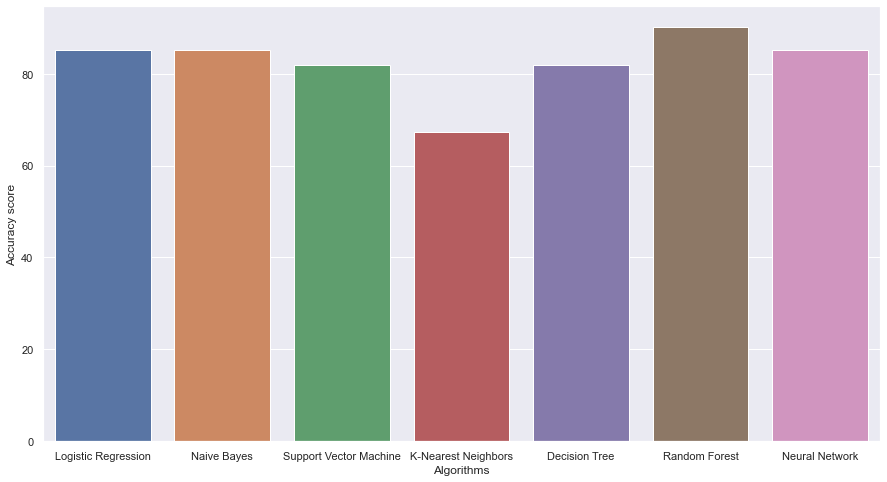

In [73]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

### Hey  random forest has good result as compare to other algorithms <br> <br>

In [74]:
import pickle

In [77]:
with open('model_randomforestversion2','wb') as f:
    pickle.dump(rf,f)

In [79]:
rf.predict([[55,0,1,132,342,0,1,166,0,1.2,2,0,2]])

array([1])